In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True) 

In [70]:
def get_forgetting_counts(sparsity):
    indicies = np.load('sgm_results/test_indicies' + str(sparsity) + '.npy')
    accuracy = np.load('sgm_results/test_accuracies' + str(sparsity) + '.npy')

#     print(indicies.shape)
#     print(accuracy.shape)

    indicies = indicies[1:]
    accuracy = accuracy[1:]

#     print(indicies.shape)
#     print(accuracy.shape)

    ind = indicies[-1]
    acc = accuracy[-1]

#     print(ind)
#     print(acc)

    accuracy_sorted = []
    indicies_sorted = []

    for epoch in range(indicies.shape[0]):
      ind = indicies[epoch]
      acc = accuracy[epoch]

      accsorted = acc[ind.argsort()]
      indsorted = sorted(ind)

      accuracy_sorted.append(accsorted)
      indicies_sorted.append(indsorted)

    accuracy_sorted = np.array(accuracy_sorted)
    indicies_sorted = np.array(indicies_sorted)

    accuracy_sorted.shape

    forgetting_counts = np.zeros(50000)
    for example in range(indicies.shape[1]):
      previous = None
      count = 0
      for epoch in range(indicies.shape[0]):
        current = accuracy_sorted[epoch][example]
        if previous == 1 and current == 0:
          count += 1
        previous = current
      forgetting_counts[example] = count
    
#     print(forgetting_counts)

    max_forget = max(forgetting_counts)
    max_forget

    unique, counts = np.unique(forgetting_counts, return_counts=True)

#     print(np.asarray((unique, counts)).T)

    all_zero = []
    for example in range(indicies.shape[1]):
      oneflag = False
      for epoch in range(indicies.shape[0]):
        current = accuracy_sorted[epoch][example]
        if current == 1:
          oneflag = True

      if not oneflag:
        all_zero.append(example)


#     print(all_zero)
#     print(len(all_zero))

    for i in all_zero:
      forgetting_counts[i] = 200
    
    all_one = []
    for example in range(indicies.shape[1]):
      zeroflag = False
      for epoch in range(indicies.shape[0]):
        current = accuracy_sorted[epoch][example]
        if current == 0:
          zeroflag = True

      if not oneflag:
        all_one.append(example)
    

    print(all_one)
    print(len(all_one))

    for i in all_zero:
      forgetting_counts[i] = 200
    
    
    for i in all_one:
      forgetting_counts[i] = -1
    
    return forgetting_counts, unique, counts

In [75]:
forgetting_counts_one, unique_one, counts_one = get_forgetting_counts(0.1)
forgetting_counts_two, unique_two, counts_two = get_forgetting_counts(0.125)
forgetting_counts_three, unique_three, counts_three = get_forgetting_counts(0.15)

[]
0
[]
0
[]
0


In [76]:
forgetting_counts_four, unique_four, counts_four = get_forgetting_counts(0.175)
forgetting_counts_five, unique_five, counts_five = get_forgetting_counts(0.2)

[]
0
[]
0


In [86]:
forgetting_counts_six, unique_six, counts_six = get_forgetting_counts(0.101)


[]
0


In [8]:
print(len(unique_three))

17


In [69]:
print(unique_one)
print(counts_one)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 21.
 23.]
[ 808 3033 6590 9297 9615 8127 5710 3535 1824  845  403  120   55   21
   12    1    1    1    2]


In [19]:
one_missing = []
two_missing = []
three_missing = []


for i in range(int(max(unique_one))):
    if i not in unique_one:
        one_missing.append(i)
        
    if i not in unique_two:
        two_missing.append(i)
        
    if i not in unique_three:
        three_missing.append(i)


print(one_missing, max(unique_one))
print(two_missing, max(unique_two))
print(three_missing, max(unique_three))

[17, 18, 19, 20, 22] 23.0
[17, 18, 19, 20, 21, 22] 16.0
[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22] 8.0


In [77]:
def extend_to_len(ind, count, n):
    n = int(n)
    new_count = [0] * (n + 1)
    for i in range(len(ind)):
        new_count[int(ind[i])] = count[i]
    
    new_ind = [*range(0, n + 1)]
    return new_ind, new_count

# print(unique_one)
# new_ind, new_count = extend_to_len(unique_one, counts_one, max(unique_one))

# print(new_ind)
# print(new_count)

In [89]:
# unique_one, counts_one = extend_to_len(unique_one, counts_one, max(unique_one))
# unique_two, counts_two = extend_to_len(unique_two, counts_two, max(unique_one))
# unique_three, counts_three = extend_to_len(unique_three, counts_three, max(unique_one))
# unique_four, counts_four = extend_to_len(unique_four, counts_four, max(unique_one))
# unique_five, counts_five = extend_to_len(unique_five, counts_five, max(unique_one))
unique_six, counts_six = extend_to_len(unique_six, counts_six, max(unique_one))

In [88]:
print(len(unique_one))
print(counts_one)
print(counts_two)
print(counts_three)
print(counts_four)
print(counts_five)
print(counts_six)

24
[808, 3033, 6590, 9297, 9615, 8127, 5710, 3535, 1824, 845, 403, 120, 55, 21, 12, 1, 1, 0, 0, 0, 0, 1, 0, 2]
[15911, 18441, 10603, 3730, 1051, 218, 37, 7, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1224, 4422, 8293, 10282, 9643, 7295, 4562, 2406, 1158, 461, 171, 51, 23, 5, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0]
[16994, 18535, 9948, 3415, 893, 176, 34, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[17333, 18509, 9874, 3253, 838, 163, 27, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[14876 18282 10910  4347  1261   265    45    12     2]


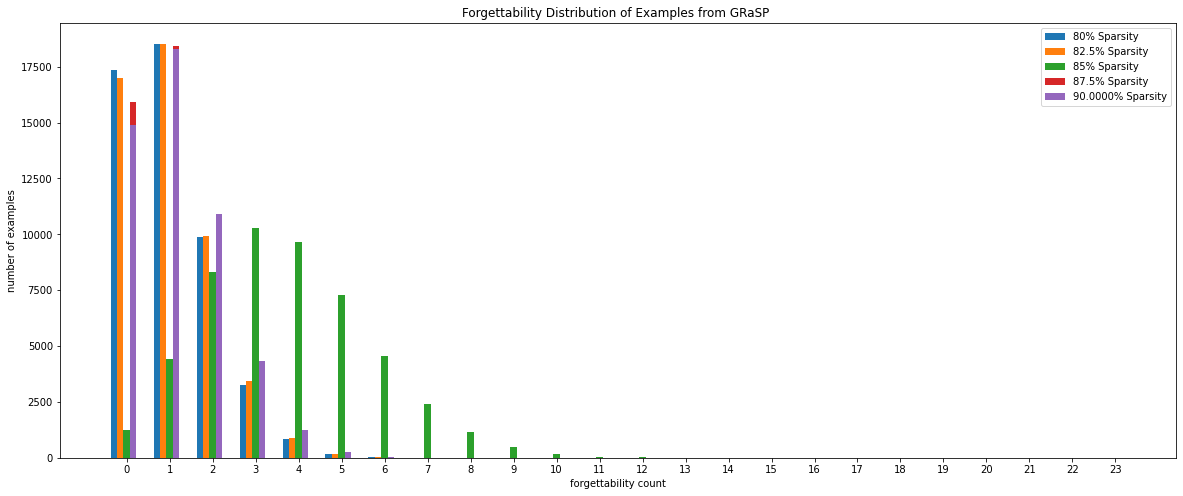

In [92]:
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator
import math

x_axis = np.arange(len(unique_one))
plt.rcParams["figure.figsize"] = (20,8)

width = 0.15

# plt.yscale("log")
plt.bar(x_axis - width - width, counts_five, width=width, label = '80% Sparsity')
plt.bar(x_axis - width, counts_four, width=width, label = '82.5% Sparsity')
plt.bar(x_axis, counts_three, width=width, label = '85% Sparsity')
plt.bar(x_axis + width, counts_two, width=width, label = '87.5% Sparsity')
# plt.bar(x_axis + width + width, counts_one, width=width, label = '90% Sparsity')
plt.bar(x_axis + width, counts_six, width=width, label = '90.0000% Sparsity')


# plt.plot(x_axis, counts_five, label = '80% Sparsity')
# plt.plot(x_axis, counts_four, label = '82.5% Sparsity')
# plt.plot(x_axis, counts_three, label = '85% Sparsity')
# # plt.bar(x_axis + width, counts_two, width=width, label = '87.5% Sparsity')
# plt.plot(x_axis, counts_one, label = '90% Sparsity')


# plt.xticks(x_axis.astype(int), unique_one)
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

new_list = range(math.floor(min(unique_one)), math.ceil(max(unique_one))+1)
plt.xticks(new_list)

plt.legend()

plt.xlabel('forgettability count')
plt.ylabel('number of examples')
plt.title('Forgettability Distribution of Examples from GRaSP ')
plt.savefig("sgm.jpeg")


plt.show()



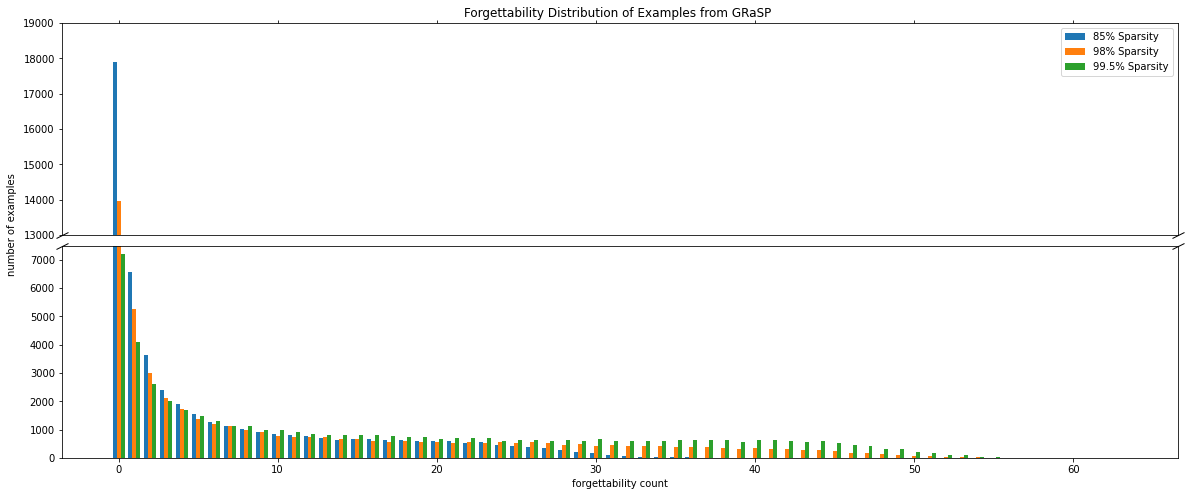

In [192]:
import numpy as np
import matplotlib.pyplot as plt

# Now let's make two outlier points which are far away from everything.

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes

ax1.bar(x_axis - width, counts_three, width=width, label = '85% Sparsity')
ax1.bar(x_axis, counts_two, width=width, label = '98% Sparsity')
ax1.bar(x_axis + width, counts_one, width=width, label = '99.5% Sparsity')
ax2.bar(x_axis - width, counts_three, width=width, label = '85% Sparsity')
ax2.bar(x_axis, counts_two, width=width, label = '98% Sparsity')
ax2.bar(x_axis + width, counts_one, width=width, label = '99.5% Sparsity')

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(13000, 19000)  # outliers only
ax2.set_ylim(0, 7500)  # most of the data

# hide the spines between ax and ax2
# ax1.spines.bottom.set_visible(False)
# ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.legend()

ax1.yaxis.set_label_coords(-0.04,0.05)
plt.xlabel('forgettability count')
ax1.set_ylabel('number of examples')
ax1.set_title('Forgettability Distribution of Examples from GRaSP ')
plt.savefig("grasp.jpeg")

plt.show()

In [168]:
len(counts_three)
len(counts_three)
len(counts_three)

62

In [171]:
max(unique_three)

42.0

In [188]:
print(unique_one)
print(counts_one)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0]
[7188, 4104, 2603, 2009, 1674, 1480, 1303, 1131, 1132, 996, 979, 909, 828, 797, 789, 799, 822, 754, 737, 726, 679, 701, 713, 707, 595, 635, 623, 594, 626, 609, 647, 579, 600, 602, 598, 628, 622, 642, 626, 575, 634, 619, 602, 574, 584, 521, 457, 401, 322, 296, 202, 163, 104, 85, 32, 21, 8, 6, 3, 2, 2, 0, 0, 1]


In [180]:
unique_one = sorted(np.append(unique_one, [61, 62]))

In [182]:
counts_one = list(counts_one)

In [183]:
counts_one.pop()

1

In [187]:
counts_one.append(1)

In [200]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = forgetting_counts_two
data2 = forgetting_counts_three
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.739


In [196]:
large_forgetting_counts

NameError: name 'large_forgetting_counts' is not defined

In [282]:
import pickle
with open('cifar10_sorted_fulldata.pkl', 'rb') as f:
    forget = pickle.load(f)

In [283]:
forget

{'indices': array([10538, 32125, 40142, ..., 32791, 18470, 47111]),
 'forgetting counts': array([ 0,  0,  0, ..., 34, 34, 34])}

In [287]:
forget_forgetting_counts_sorted = forget['forgetting counts'][forget['indices'].argsort()]
forget_indsorted = sorted(forget['indices'])

In [296]:
import pandas as pd

d = pd.DataFrame()

In [297]:
d['forget'] = forget_forgetting_counts_sorted 
d['85'] = forgetting_counts_three
d['90'] = forgetting_counts_four
d['95'] = forgetting_counts_five
d['98'] = forgetting_counts_two
d['99.5'] = forgetting_counts_one


In [298]:
d

,forget,85,90,95,98,99.5
0,3,4.0,6.0,3.0,8.0,32.0
1,1,0.0,1.0,0.0,0.0,1.0
2,4,3.0,6.0,3.0,4.0,25.0
3,1,0.0,0.0,0.0,0.0,2.0
4,0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...
49995,15,12.0,9.0,8.0,14.0,0.0
49996,25,31.0,34.0,36.0,28.0,37.0
49997,14,19.0,16.0,26.0,29.0,44.0
49998,0,0.0,0.0,0.0,2.0,2.0


In [292]:
from sklearn.metrics import mean_squared_error

mean_squared_error(d['forget'],d['85'])

12.16066

In [293]:
d['85'].corr(d['forget'])

0.8978060087344232

In [299]:
d.corr()

,forget,85,90,95,98,99.5
forget,1.000000,0.897806,0.896837,0.884346,0.806321,0.476671
85,0.897806,1.000000,0.908550,0.896195,0.806985,0.440698
90,0.896837,0.908550,1.000000,0.900464,0.821678,0.454147
95,0.884346,0.896195,0.900464,1.000000,0.838281,0.479025
98,0.806321,0.806985,0.821678,0.838281,1.000000,0.577731
99.5,0.476671,0.440698,0.454147,0.479025,0.577731,1.000000


In [326]:
a=d.loc[d['forget'] == 30]

In [328]:
print(len(a))

38


In [334]:
s = a.sum(axis=0)/len(a)

s

forget    30.000000
85        26.394737
90        29.394737
95        35.157895
98        37.368421
99.5      32.289474
dtype: float64

In [361]:
def get_avg_forgettability(value):
    a=d.loc[d['forget'] == value]
    s = a.sum(axis=0)/len(a)
    return(s[1:])

In [366]:
def get_avg_forgettability(value):
    a=d.loc[ (d['forget'] >= value) & (d['forget'] < value + 5) ]
    s = a.sum(axis=0)/len(a)
    return(s[1:])

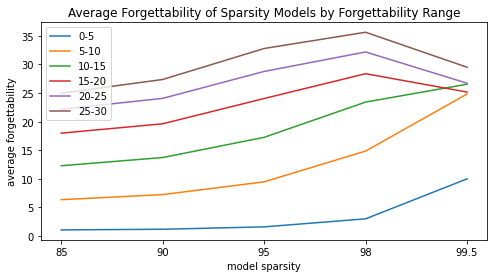

In [370]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 4)

for i in [0, 5, 10 , 15, 20, 25]:
    plt.plot(['85', '90', '95', '98', '99.5'], get_avg_forgettability(i), label=str(i) + "-" + str(i+5))


plt.legend(loc='upper left')
plt.xlabel("model sparsity")
plt.ylabel("average forgettability")
plt.title("Average Forgettability of Sparsity Models by Forgettability Range")
plt.savefig("eight.jpeg")


plt.show()

In [363]:
max(d['forget'])

34